In [341]:
import json
import ast

from itertools import cycle

In [221]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [369]:
col_to_use = "MV101"

# good

df = pd.read_csv(f"/data/graham/swat_experiments/data/outputs/latest/{col_to_use}_dataframe.csv")
df_svd = pd.read_csv(f"/data/graham/swat_experiments/data/outputs/latest/{col_to_use}_svd_dataframe.csv")

# bad 

df_bad = pd.read_csv(f"/data/graham/swat_experiments/data/outputs/reset_params_model/{col_to_use}_dataframe.csv")
df_svd_bad = pd.read_csv(f"/data/graham/swat_experiments/data/outputs/reset_params_model/{col_to_use}_svd_dataframe.csv")


df.svd = df.svd.map(ast.literal_eval)
df.norm = df.norm.map(ast.literal_eval)

df_bad.svd = df_bad.svd.map(ast.literal_eval)
df_bad.norm = df_bad.norm.map(ast.literal_eval)


df_svd.svd = df_svd.svd.map(ast.literal_eval)
df_svd_bad.svd = df_svd_bad.svd.map(ast.literal_eval)

In [355]:
colors = cycle(["salmon", "peru", "seagreen", "mediumturquoise", "cadetblue", "dodgerblue", "slateblue", "orchid", "palevioletred"])

In [370]:
groups_bad.groups

{(0, 0.1, 'adversarial'): [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39], (0, 0.1, 'normal'): [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38], (0, 1.0, 'adversarial'): [41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79], (0, 1.0, 'normal'): [40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78], (0, 2.0, 'adversarial'): [81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119], (0, 2.0, 'normal'): [80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118], (1, 0.1, 'adversarial'): [121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159], (1, 0.1, 'normal'): [120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158], (1, 1.0, 'adversarial'): [161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 19

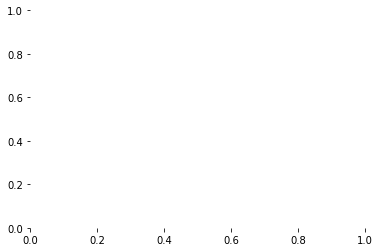

In [428]:
plt.box(False)

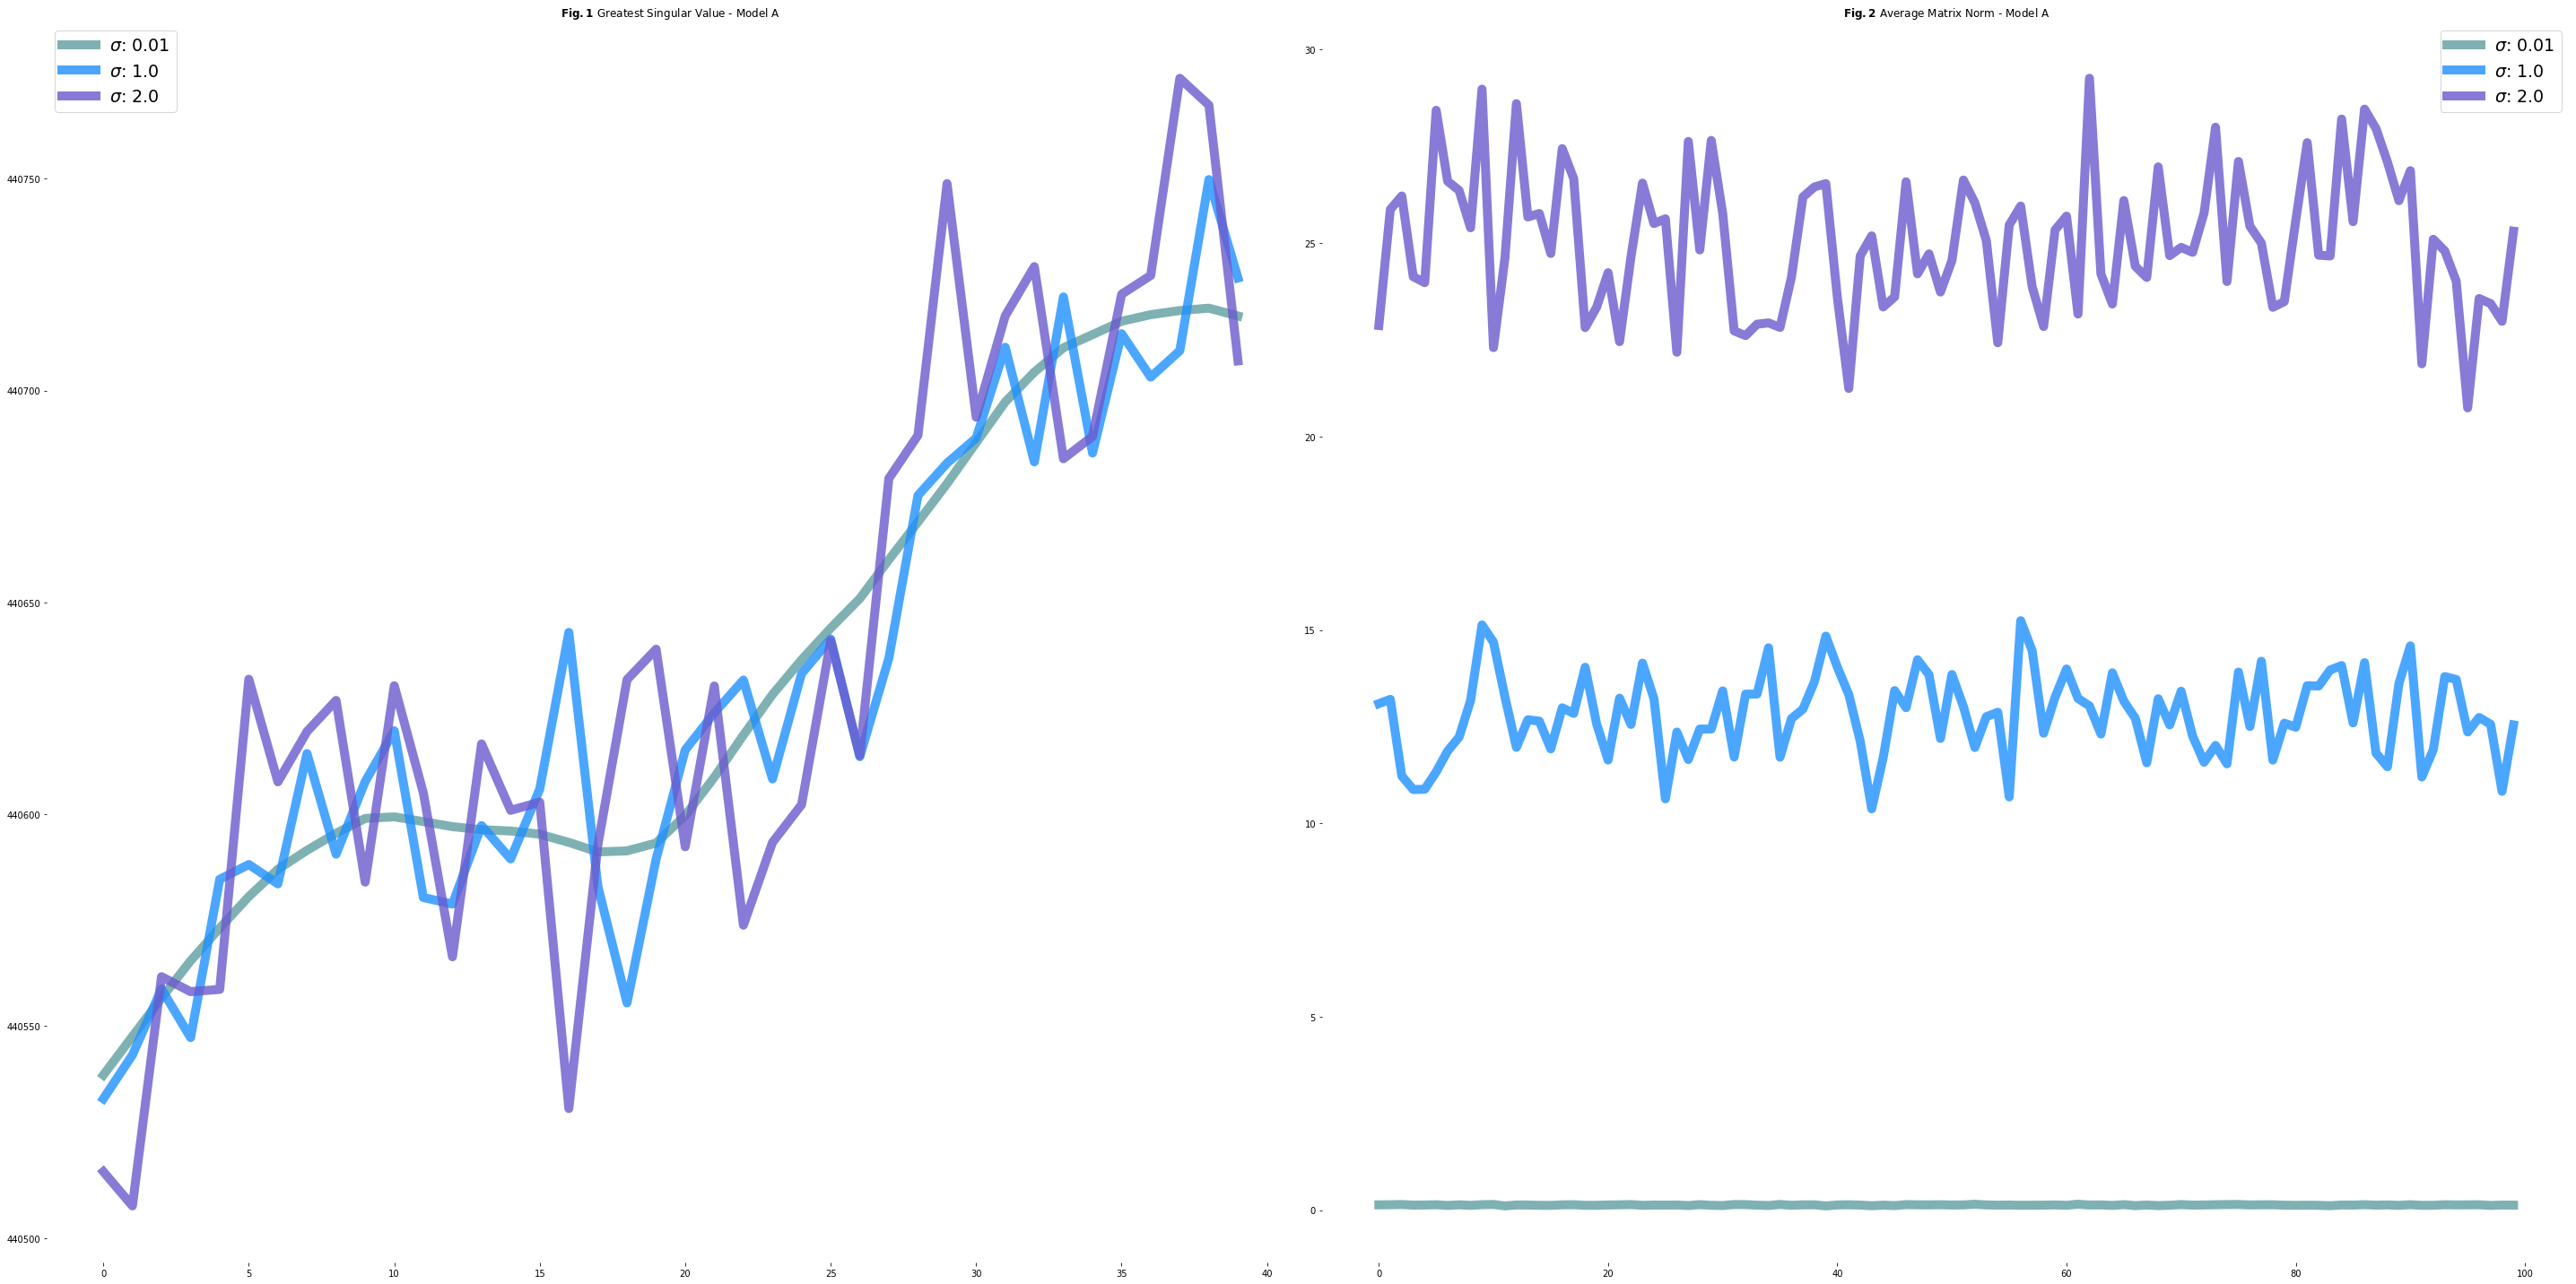

In [498]:
_group_by_cols = ["attack_idx", "sigma_value", "attack_type"]
groups = df.groupby(_group_by_cols)
groups_bad = df_bad.groupby(_group_by_cols)
group_keys = list(groups.groups.keys())


colors_ = ["cadetblue", "dodgerblue", "slateblue", "orchid"]
fig, axs = plt.subplots(1, 2 , figsize=(40, 20))

ii = 0 
dd = {}

for group_idx, group in enumerate(group_keys):
    if group[0] != 1 or group[2] == "adversarial":
        continue
        
    label = f"$\sigma$: {group[1]}"
    if group[2] == "adversarial":
        label += f'- {group[2]}'
    color = next(colors)
    
    axs[0].plot([val["relu_1"][0] for val in groups.get_group(group).svd.values[30:70]], label=label, linewidth=10, alpha=0.8, c=colors_[ii])
    axs[1].plot([val["relu_1"] for val in groups.get_group(group).norm.values], label=label, linewidth=10, alpha=0.8, c=colors_[ii])
    dd[ii] = colors_[ii]
    ii += 1
    
    
axs[0].set_title(r"$\bf{Fig. 1}$ Greatest Singular Value - Model A")
axs[1].set_title(r"$\bf{Fig. 2}$ Average Matrix Norm - Model A")

_legend_prop = {'size': 19}
# axs[0].axis("off")
axs[0].set(frame_on=False)
axs[1].set(frame_on=False)
axs[0].legend(prop=_legend_prop)
axs[1].legend(prop=_legend_prop)
plt.tight_layout()


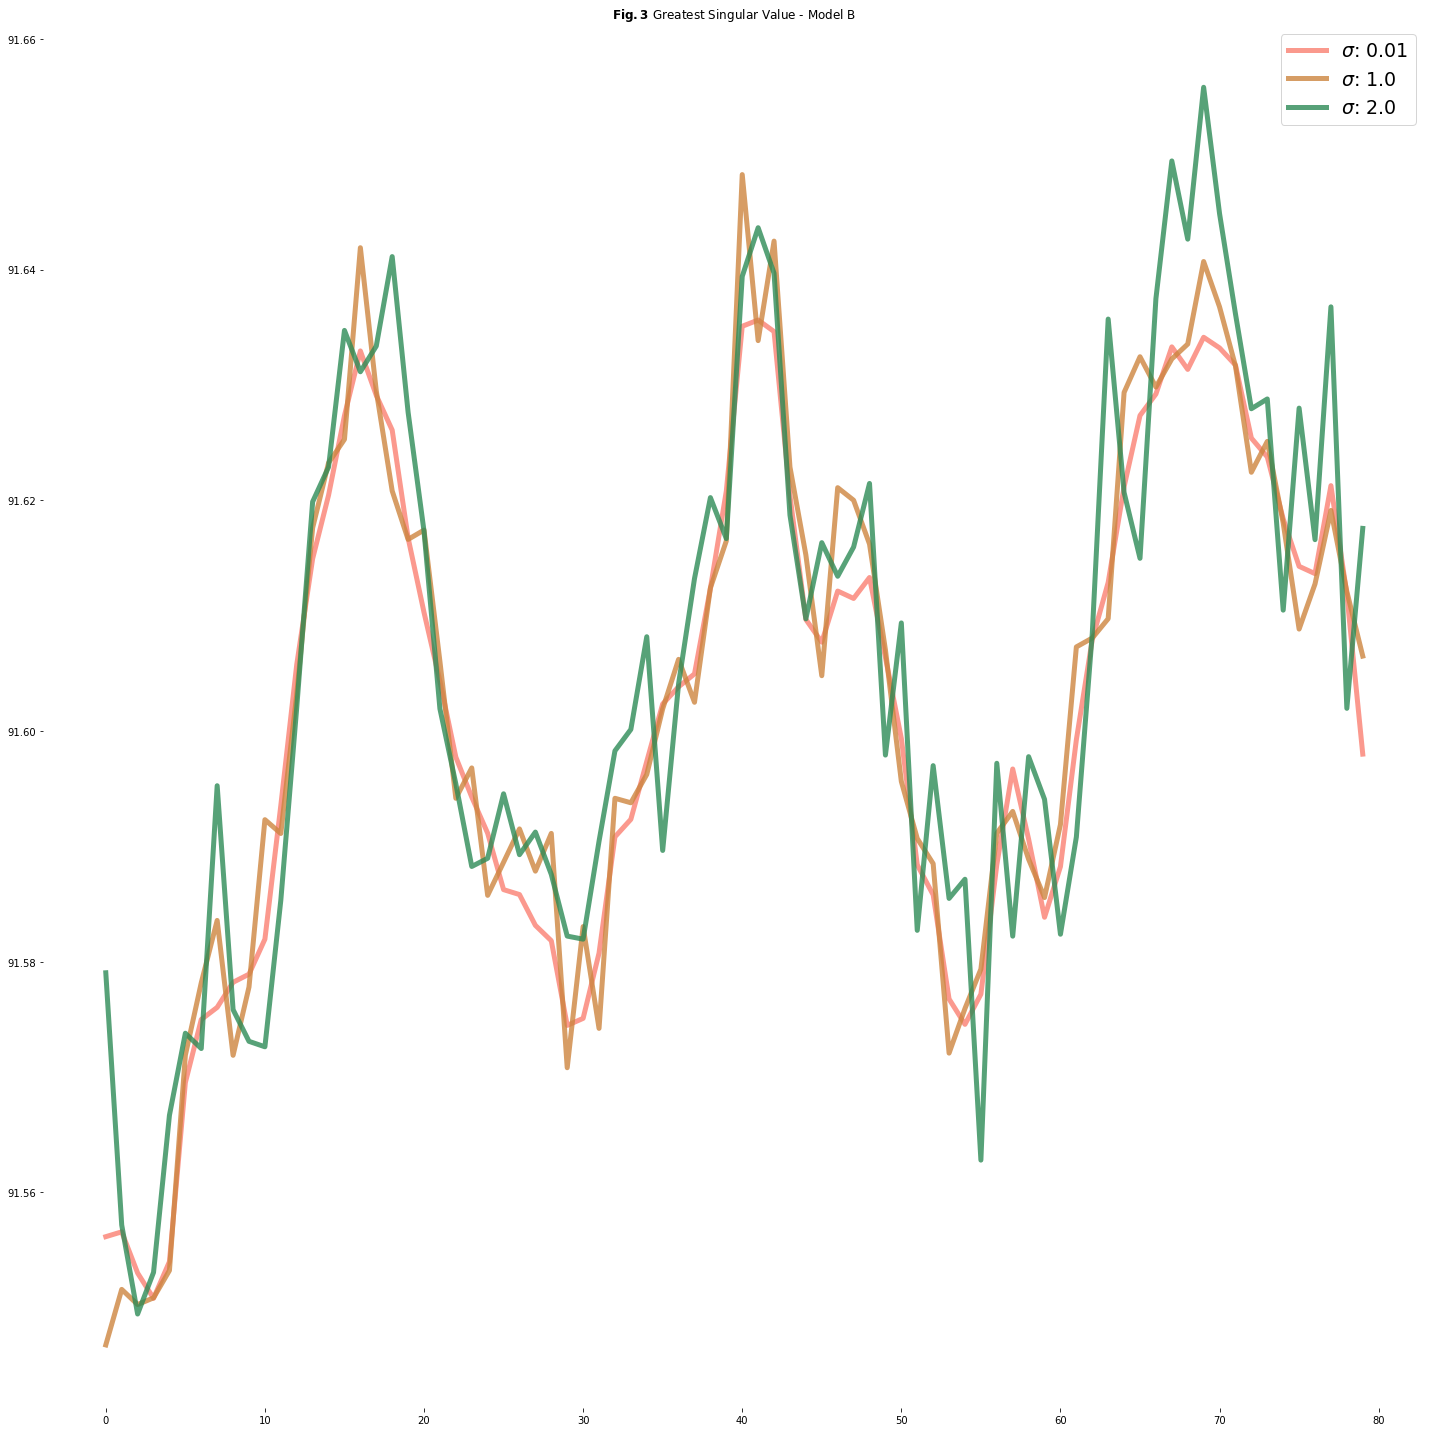

In [496]:
_group_by_cols = ["attack_idx", "sigma_value", "attack_type"]
groups = df.groupby(_group_by_cols)
groups_bad = df_bad.groupby(_group_by_cols)
group_keys = list(groups.groups.keys())



fig, axs = plt.subplots(1, 1 , figsize=(20, 20))

colors__ = ["salmon", "peru", "seagreen"]
jj =0 


for group_idx, group in enumerate(group_keys):
    if group[0] != 1 or group[2] == "adversarial":
        continue
        
    label = f"$\sigma$: {group[1]}"
    if group[2] == "adversarial":
        label += f'- {group[2]}'
    color = next(colors)
    
    axs.plot([val["relu_1"][0] for val in groups_bad.get_group(group).svd.values[0:80]], label=label, linewidth=5, alpha=0.8, c=colors__[jj])
#     axs.plot([val["relu_1"] for val in groups_bad.get_group(group).norm.values], label=label, linewidth=5, alpha=0.8, c=color)
    dd[jj+2] = colors__[jj]
    jj+=1
    
axs.set_title(r"$\bf{Fig. 3}$ Greatest Singular Value - Model B")
# axs[1].set_title(r"$\bf{Fig. 6}$ Average Matrix Norm")

_legend_prop = {'size': 19}
# axs[0].axis("off")
axs.set(frame_on=False)
# axs[1].set(frame_on=False)
axs.legend(prop=_legend_prop)
# axs[1].legend(prop=_legend_prop)
plt.tight_layout()


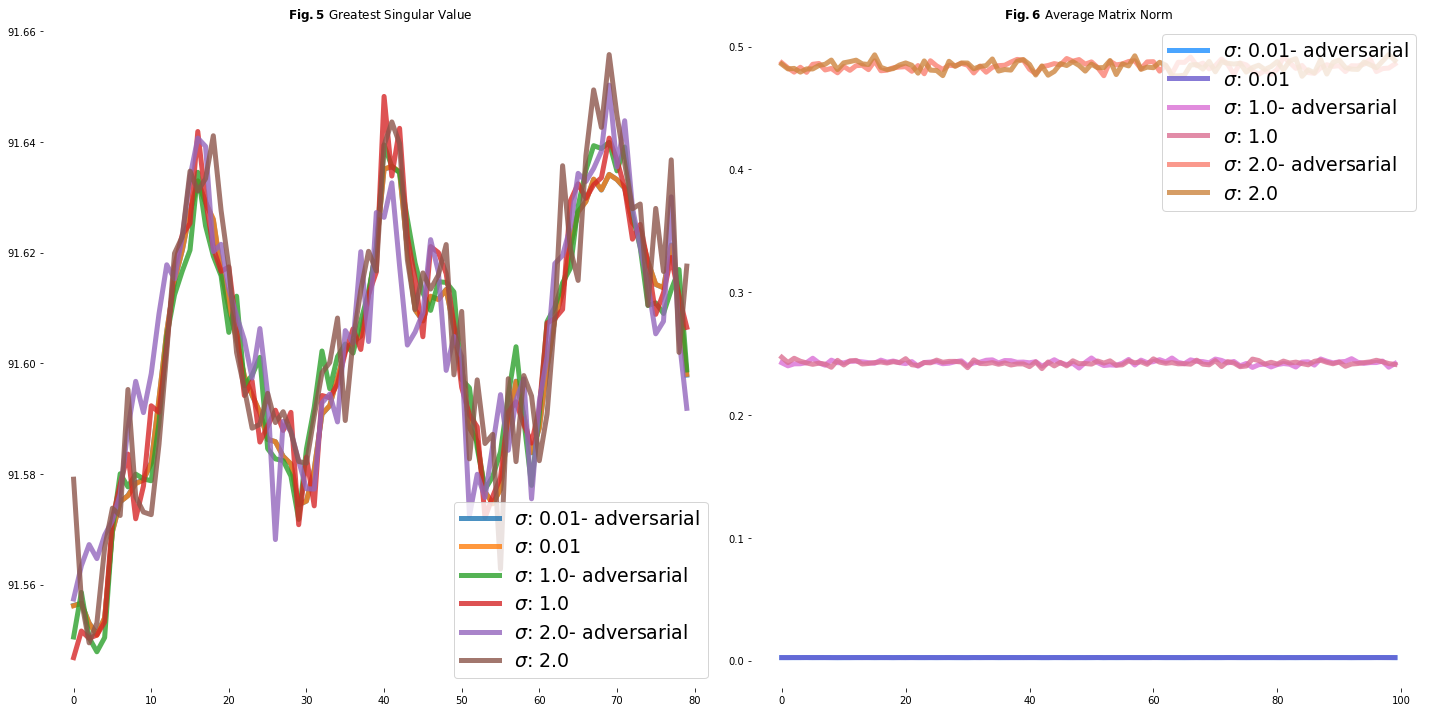

In [472]:
_group_by_cols = ["attack_idx", "sigma_value", "attack_type"]
groups = df.groupby(_group_by_cols)
groups_bad = df_bad.groupby(_group_by_cols)
group_keys = list(groups.groups.keys())



fig, axs = plt.subplots(1, 2 , figsize=(20, 10))


for group_idx, group in enumerate(group_keys):
    if group[0] != 1:
        continue
        
    label = f"$\sigma$: {group[1]}"
    if group[2] == "adversarial":
        label += f'- {group[2]}'
    color = next(colors)
    
    axs[0].plot([val["relu_1"][0] for val in groups_bad.get_group(group).svd.values[0:80]], label=label, linewidth=5, alpha=0.8)
    axs[1].plot([val["relu_1"] for val in groups_bad.get_group(group).norm.values], label=label, linewidth=5, alpha=0.8, c=color)
    
axs[0].set_title(r"$\bf{Fig. 5}$ Greatest Singular Value")
axs[1].set_title(r"$\bf{Fig. 6}$ Average Matrix Norm")

_legend_prop = {'size': 19}
# axs[0].axis("off")
axs[0].set(frame_on=False)
axs[1].set(frame_on=False)
axs[0].legend(prop=_legend_prop)
axs[1].legend(prop=_legend_prop)
plt.tight_layout()


In [225]:
df[(df.attack_idx == 0) && (df.attack_ty)]

Unnamed: 0  attack_idx dataset_column time_status  data_idx  attack_type  \
0             0           0          MV101      before     18921       normal   
1             1           0          MV101      before     18921  adversarial   
2             2           0          MV101      before     18922       normal   
3             3           0          MV101      before     18922  adversarial   
4             4           0          MV101      before     18923       normal   
..          ...         ...            ...         ...       ...          ...   
115         115           0          MV101      during     18938  adversarial   
116         116           0          MV101      during     18939       normal   
117         117           0          MV101      during     18939  adversarial   
118         118           0          MV101      during     18940       normal   
119         119           0          MV101      during     18940  adversarial   

     sigma_value                                                svd  \
0            0.1  {'linear_1': [952.54443359375, 0.2567101716995...   
1            0.1  {'linear_1': [952.5408935546875, 0.25324374437...   
2            0.1  {'linear_1': [952.5684814453125, 0.25111359357...   
3            0.1  {'linear_1': [952.5714111328125, 0.25761759281...   
4            0.1  {'linear_1': [952.5972900390625, 0.24734248220...   
..           ...                                                ...   
115          2.0  {'linear_1': [951.4970703125, 4.91041755676269...   
116          2.0  {'linear_1': [951.057861328125, 5.050229072570...   
117          2.0  {'linear_1': [951.1587524414062, 4.95570421218...   
118          2.0  {'linear_1': [951.0325317382812, 5.03732967376...   
119          2.0  {'linear_1': [950.8045654296875, 5.17105674743...   

                                                  norm  
0    {'linear_1': 0.15068137645721436, 'relu_1': 0....  
1    {'linear_1': 0.1509108990430832, 'relu_1': 0.0...  
2    {'linear_1': 0.15100541710853577, 'relu_1': 0....  
3    {'linear_1': 0.15046580135822296, 'relu_1': 0....  
4    {'linear_1': 0.14971591532230377, 'relu_1': 0....  
..                                                 ...  
115  {'linear_1': 2.9909868240356445, 'relu_1': 0.8...  
116  {'linear_1': 3.013357639312744, 'relu_1': 0.82...  
117  {'linear_1': 2.990926504135132, 'relu_1': 0.83...  
118  {'linear_1': 3.0243639945983887, 'relu_1': 0.8...  
119  {'linear_1': 3.0072052478790283, 'relu_1': 0.8...  

[120 rows x 9 columns]

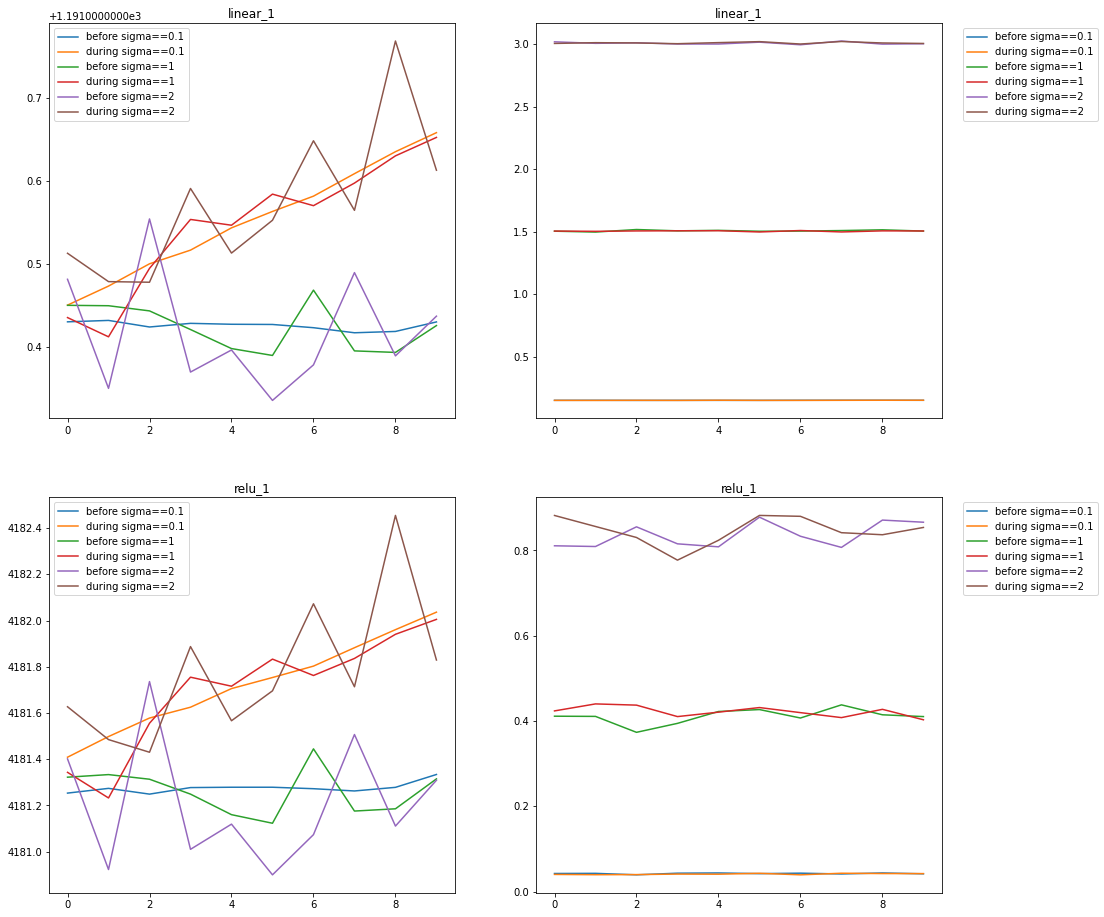

In [223]:
fig, axs = plt.subplots(2, 2 , figsize=(16, 16))

for sigma_val in [0.1, 1, 2]:
    df_before = df[(df.attack_type =="normal") & (df.attack_idx == 1) & (df.time_status == "before") & (df.sigma_value == sigma_val)]
    df_during = df[(df.attack_type =="normal") & (df.attack_idx == 1) & (df.time_status == "during") & (df.sigma_value == sigma_val)]
    
#     df_before_bad = df_bad[(df_bad.attack_type =="normal") & (df_bad.attack_idx == 1) & (df_bad.time_status == "before") & (df_bad.sigma_value == sigma_val)]
#     df_during_bad = df_bad[(df_bad.attack_type =="normal") & (df_bad.attack_idx == 1) & (df_bad.time_status == "during") & (df_bad.sigma_value == sigma_val)]
    
    for idx, key in enumerate(["linear_1", "relu_1"]):
        axs[idx, 0].plot([val[key][0] for val in df_before.svd.values], label=f"before sigma=={sigma_val}")
        axs[idx, 0].plot([val[key][0] for val in df_during.svd.values], label=f"during sigma=={sigma_val}")
        
#         axs[idx, 0].plot([val[key][0] for val in df_before_bad.svd.values], label=f"bad before sigma=={sigma_val}")
#         axs[idx, 0].plot([val[key][0] for val in df_during_bad.svd.values], label=f"bad during sigma=={sigma_val}")
        
        axs[idx, 0].legend()
        axs[idx, 0].set_title(key)

        # n     
        axs[idx, 1].plot([val[key] for val in df_before.norm.values], label=f"before sigma=={sigma_val}")
        axs[idx, 1].plot([val[key] for val in df_during.norm.values], label=f"during sigma=={sigma_val}")
        
#         axs[idx, 1].plot([val[key] for val in df_before_bad.norm.values], label=f"bad before sigma=={sigma_val}")
#         axs[idx, 1].plot([val[key] for val in df_during_bad.norm.values], label=f"bad before sigma=={sigma_val}")
        
        


        axs[idx, 1].legend(bbox_to_anchor=(1.04,1), loc="upper left")

        axs[idx, 1].set_title(key)


        


In [210]:
vals = np.log([val["linear_1"] for val in df[(df.attack_type =="normal") & (df.attack_idx == 1) & (df.time_status == "before") & (df.data_idx == 63947)].svd])
sum(vals[0,:] - vals[1,:]), sum(vals[0,:] - vals[2,:])

(-9.224905008659956, -11.993623128871626)

In [384]:
df[df.data_idx == 63947]

Unnamed: 0  attack_idx dataset_column time_status  data_idx  \
680          680           1          MV101      before     63947   
681          681           1          MV101      before     63947   
880          880           1          MV101      before     63947   
881          881           1          MV101      before     63947   
1080        1080           1          MV101      before     63947   
1081        1081           1          MV101      before     63947   

      attack_type  sigma_value  \
680        normal         0.01   
681   adversarial         0.01   
880        normal         1.00   
881   adversarial         1.00   
1080       normal         2.00   
1081  adversarial         2.00   

                                                    svd  \
680   {'linear_1': [8893.8720703125, 0.0773160010576...   
681   {'linear_1': [8893.8671875, 0.0797215476632118...   
880   {'linear_1': [8894.263671875, 7.62328958511352...   
881   {'linear_1': [8893.6484375, 7.704300880432129,...   
1080  {'linear_1': [8894.4716796875, 15.184170722961...   
1081  {'linear_1': [8894.3349609375, 15.579939842224...   

                                                   norm  
680   {'linear_1': 0.04598723724484444, 'relu_1': 0....  
681   {'linear_1': 0.04611222445964813, 'relu_1': 0....  
880   {'linear_1': 4.599767208099365, 'relu_1': 14.0...  
881   {'linear_1': 4.588892936706543, 'relu_1': 12.3...  
1080  {'linear_1': 9.215414047241211, 'relu_1': 23.6...  
1081  {'linear_1': 9.162532806396484, 'relu_1': 23.9...

In [385]:
df_bad[df_bad.data_idx == 63947]

Unnamed: 0  attack_idx dataset_column time_status  data_idx  \
680          680           1          MV101      before     63947   
681          681           1          MV101      before     63947   
880          880           1          MV101      before     63947   
881          881           1          MV101      before     63947   
1080        1080           1          MV101      before     63947   
1081        1081           1          MV101      before     63947   

      attack_type  sigma_value  \
680        normal         0.01   
681   adversarial         0.01   
880        normal         1.00   
881   adversarial         1.00   
1080       normal         2.00   
1081  adversarial         2.00   

                                                    svd  \
680   {'linear_1': [629.5692138671875, 0.02538874559...   
681   {'linear_1': [629.5692749023438, 0.02493061311...   
880   {'linear_1': [629.5687866210938, 2.51803231239...   
881   {'linear_1': [629.5714721679688, 2.53735756874...   
1080  {'linear_1': [629.5697631835938, 5.11999654769...   
1081  {'linear_1': [629.5731201171875, 5.04033279418...   

                                                   norm  
680   {'linear_1': 0.01520150899887085, 'relu_1': 0....  
681   {'linear_1': 0.015185471624135971, 'relu_1': 0...  
880   {'linear_1': 1.512335181236267, 'relu_1': 0.23...  
881   {'linear_1': 1.5146441459655762, 'relu_1': 0.2...  
1080  {'linear_1': 3.042069911956787, 'relu_1': 0.48...  
1081  {'linear_1': 3.037355422973633, 'relu_1': 0.48...

In [392]:
vals = np.log([val["relu_1"] for val in df[(df.attack_type == "normal") & (df.attack_idx == 1) & (df.time_status == "before") & (df.data_idx == 63948)].svd])
sum(vals[0,:])/sum(vals[1,:]), sum(vals[0,:])/sum(vals[2,:])

(0.25110925499119846, 0.21914756528740145)

In [391]:
vals = np.log([val["relu_1"] for val in df_bad[(df_bad.attack_type =="normal") & (df_bad.attack_idx == 1) & (df_bad.time_status == "before") & (df_bad.data_idx == 63948)].svd])
sum(vals[0,:])/sum(vals[1,:]), sum(vals[0,:])/sum(vals[2,:])

(-9.141844604271146, -3.696535043923181)

In [398]:
good_vals

array([], dtype=float64)

In [397]:
sum(good_vals[0,:])/sum(a[1,:]), sum(good_vals[0,:])/sum(good_vals[2,:])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

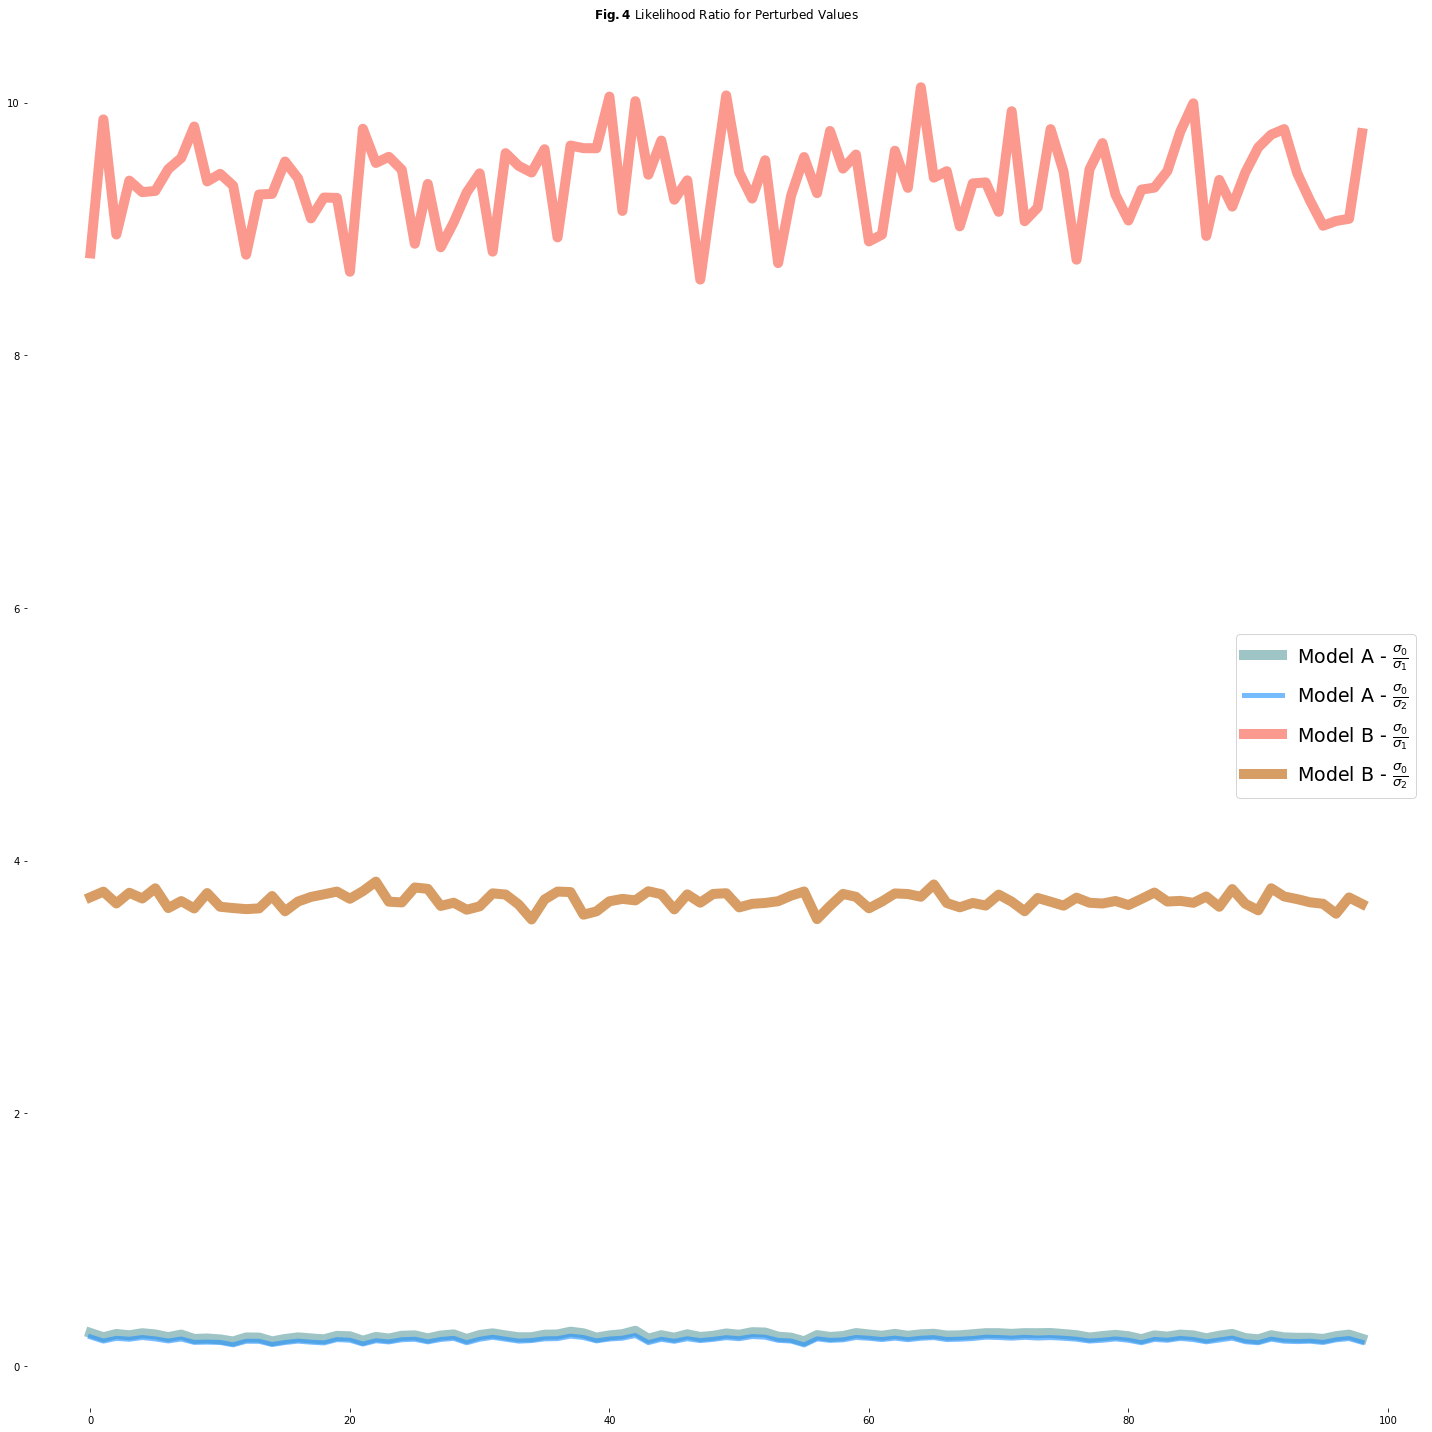

In [495]:


g1, g2 = [], []
b1, b2 = [], []

fig, axs = plt.subplots(1,1, figsize=(20, 20))

for layer in ["relu_1"]:
    for data_idx in range(63907,64006):
        good_vals = np.log([val[layer] for val in df[(df.attack_type == "normal") & (df.data_idx == data_idx)].svd])
        bad_vals = np.log([val[layer] for val in df_bad[(df_bad.attack_type =="normal") & (df_bad.data_idx == data_idx)].svd])

        good_ratio1, good_ratio2 = sum(good_vals[0,:])/sum(good_vals[1,:]), sum(good_vals[0,:])/sum(good_vals[2,:])
        bad_ratio1, bad_ratio2 = sum(bad_vals[0,:])/sum(bad_vals[1,:]), sum(bad_vals[0,:])/sum(bad_vals[2,:])
        g1.append(abs(good_ratio1)), g2.append((good_ratio2))
        b1.append(abs(bad_ratio1)), b2.append(abs(bad_ratio2))



    
    axs.plot(g1, label=r"Model A - $\frac{\sigma_0}{\sigma_1}$", linewidth=10, alpha=0.6, c=dd[0])
    axs.plot(g2, label=r"Model A - $\frac{\sigma_0}{\sigma_2}$", linewidth=5, alpha=0.6, c=dd[1])
    axs.plot(b1, label=r"Model B - $\frac{\sigma_0}{\sigma_1}$", linewidth=10, alpha=0.8, c=dd[2])
    axs.plot(b2, label=r"Model B - $\frac{\sigma_0}{\sigma_2}$", linewidth=10, alpha=0.8, c=dd[3])
    # axs.plot([g1,g2,b1,b2])
    
axs.legend()
_legend_prop = {'size': 19}
axs.set(frame_on=False)
axs.legend(prop=_legend_prop)
axs.set_title(r"$\bf{Fig. 4}$ Likelihood Ratio for Perturbed Values")

plt.tight_layout()


In [484]:
dd

{0: 'cadetblue', 1: 'dodgerblue', 2: 'salmon', 3: 'peru', 4: 'seagreen'}

In [140]:
svd_vals_before1 = df_before[(df_before.sigma_value == 1.0) & (df_before.attack_type == "normal")][0:10]["svd"].values
svd_vals_before2 = df_before[(df_before.sigma_value == 2.0) & (df_before.attack_type == "normal")][0:10]["svd"].values

svd_vals_before3 = df_before[(df_before.sigma_value == 1.0) & (df_before.attack_type == "adversarial")][0:10]["svd"].values
svd_vals_before4 = df_before[(df_before.sigma_value == 2.0) & (df_before.attack_type == "adversarial")][0:10]["svd"].values


norm_vals_before1 = df_before[(df_before.sigma_value == 1.0) & (df_before.attack_type == "normal")][0:10]["norm"].values
norm_vals_before2 = df_before[(df_before.sigma_value == 2.0) & (df_before.attack_type == "normal")][0:10]["norm"].values

norm_vals_before3 = df_before[(df_before.sigma_value == 1.0) & (df_before.attack_type == "adversarial")][0:10]["norm"].values
norm_vals_before4 = df_before[(df_before.sigma_value == 2.0) & (df_before.attack_type == "adversarial")][0:10]["norm"].values



svd_vals_during1 = df_during[(df_during.sigma_value == 1.0) & (df_during.attack_type == "normal")][0:10]["svd"].values
svd_vals_during2 = df_during[(df_during.sigma_value == 2.0) & (df_during.attack_type == "normal")][0:10]["svd"].values

svd_vals_during3 = df_during[(df_during.sigma_value == 1.0) & (df_during.attack_type == "adversarial")][0:10]["svd"].values
svd_vals_during4 = df_during[(df_during.sigma_value == 2.0) & (df_during.attack_type == "adversarial")][0:10]["svd"].values



norm_vals_during1 = df_during[(df_during.sigma_value == 1.0) & (df_during.attack_type == "normal")][0:10]["norm"].values
norm_vals_during2 = df_during[(df_during.sigma_value == 2.0) & (df_during.attack_type == "normal")][0:10]["norm"].values

norm_vals_during3 = df_during[(df_during.sigma_value == 1.0) & (df_during.attack_type == "adversarial")][0:10]["norm"].values
norm_vals_during4 = df_during[(df_during.sigma_value == 2.0) & (df_during.attack_type == "adversarial")][0:10]["norm"].values

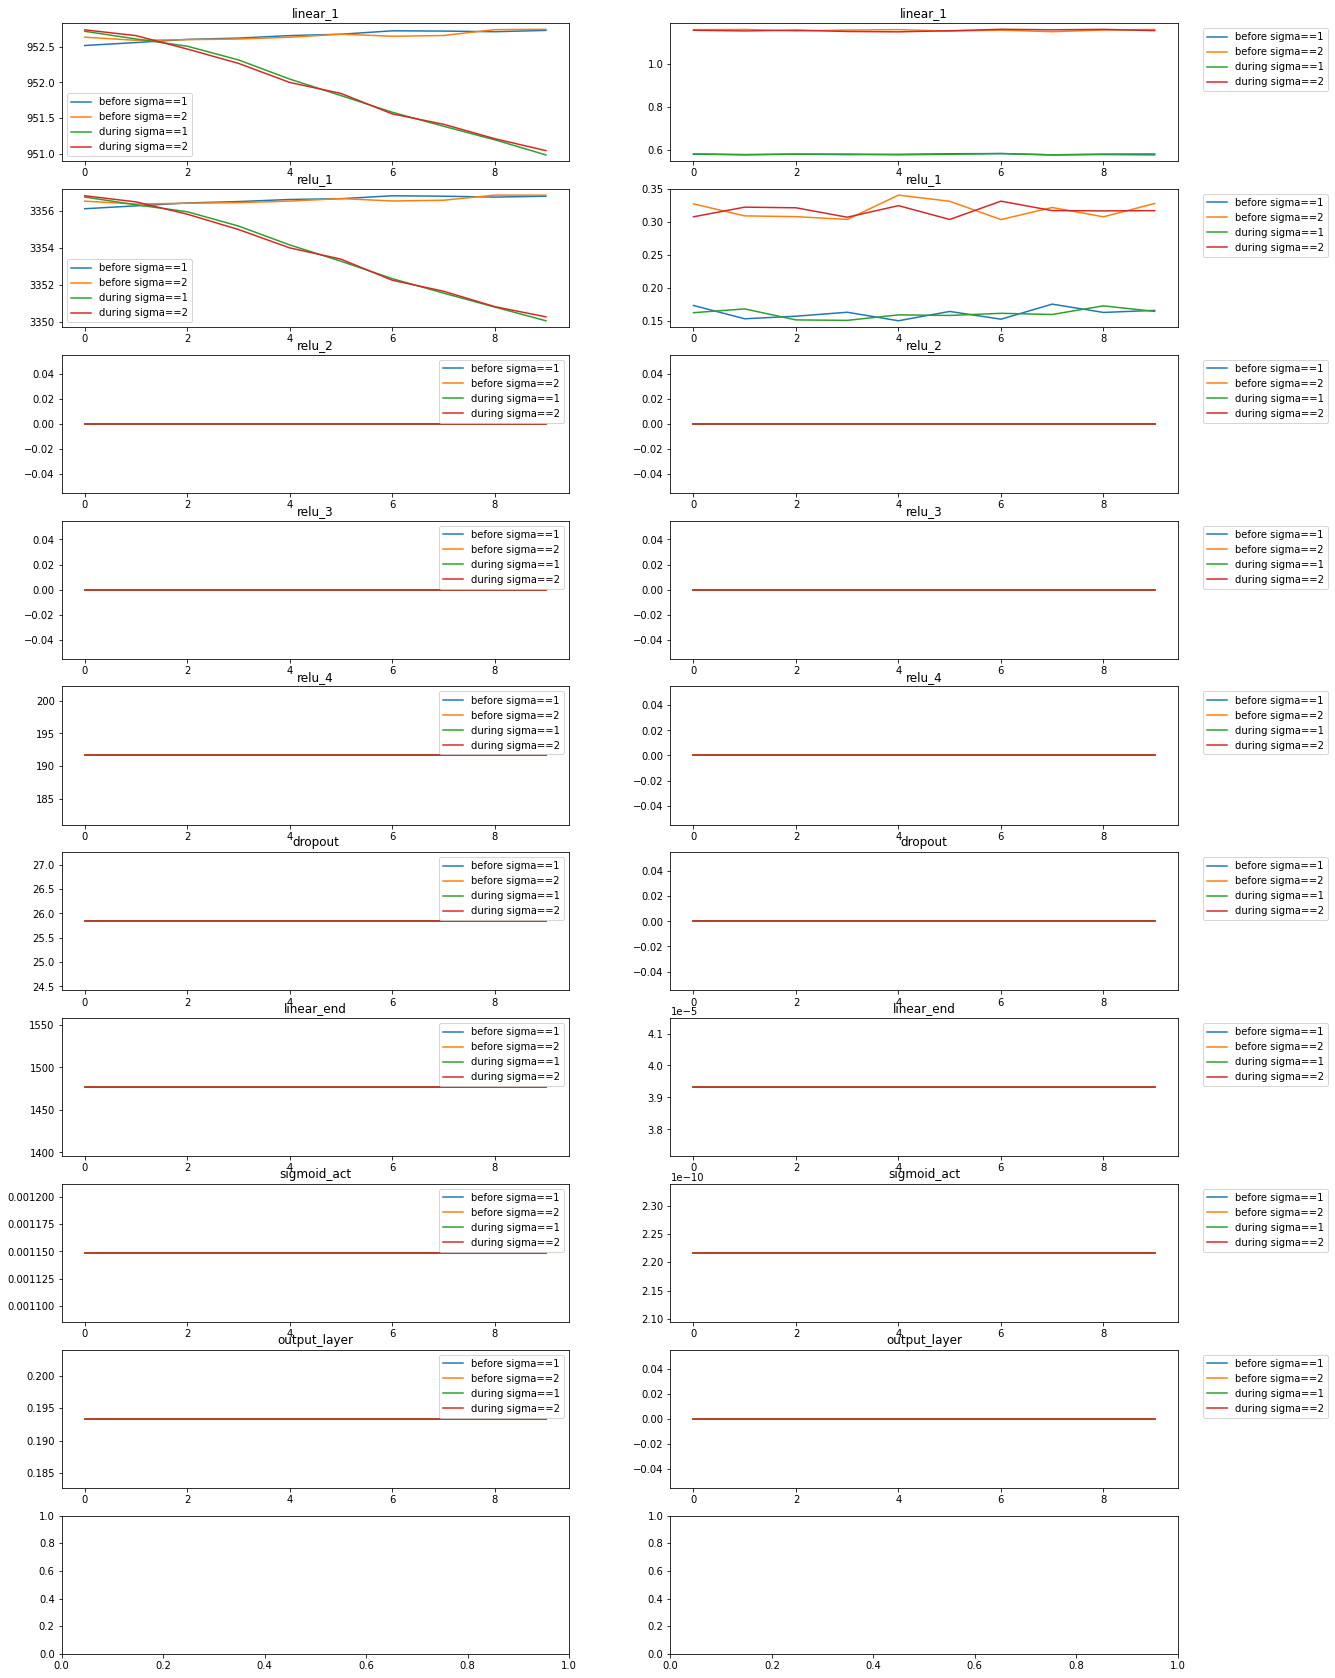

In [141]:
fig, axs = plt.subplots(10, 2 , figsize=(20, 30))

    
for idx, key in enumerate(svd_vals_before1[0].keys()):
    axs[idx, 0].plot([val[key][0] for val in svd_vals_before1], label="before sigma==1")
    axs[idx, 0].plot([val[key][0] for val in svd_vals_before2], label="before sigma==2")
#     axs[idx, 0].plot([val[key][0] for val in svd_vals_before3], label="adv-before sigma==1")
#     axs[idx, 0].plot([val[key][0] for val in svd_vals_before4], label="adv-before sigma==2")
    
    axs[idx, 0].plot([val[key][0] for val in svd_vals_during1], label="during sigma==1")
    axs[idx, 0].plot([val[key][0] for val in svd_vals_during2], label="during sigma==2")
    axs[idx, 0].legend()
    axs[idx, 0].set_title(key)
    
    # n     
    axs[idx, 1].plot([val[key] for val in norm_vals_before1], label="before sigma==1")
    axs[idx, 1].plot([val[key] for val in norm_vals_before2], label="before sigma==2")
    
#     axs[idx, 1].plot([val[key] for val in norm_vals_before3], label="adv-before sigma==1")
#     axs[idx, 1].plot([val[key] for val in norm_vals_before4], label="adv-before sigma==2")
    
    axs[idx, 1].plot([val[key] for val in norm_vals_during1], label="during sigma==1")
    axs[idx, 1].plot([val[key] for val in norm_vals_during2], label="during sigma==2")
    
#     axs[idx, 1].plot([val[key] for val in norm_vals_during3], label="adv-during sigma==1")
#     axs[idx, 1].plot([val[key] for val in norm_vals_during4], label="adv-during sigma==2")
    
    axs[idx, 1].legend(bbox_to_anchor=(1.04,1), loc="upper left")

    axs[idx, 1].set_title(key)
    
    

In [82]:
df_svd[(df_svd.time_status=="before") & (df_svd.attack_type == "normal")]

Unnamed: 0  attack_idx dataset_column time_status attack_type  \
0            0           0          MV101      before      normal   
4            4           0          MV101      before      normal   
8            8           1          MV101      before      normal   
12          12           1          MV101      before      normal   

    sigma_value                                                svd  
0           1.0  {'linear_1': [13440.3125, 17.477357864379883, ...  
4           2.0  {'linear_1': [13438.96484375, 28.5192756652832...  
8           1.0  {'linear_1': [17405.52734375, 16.3048362731933...  
12          2.0  {'linear_1': [17404.95703125, 28.1958827972412...

In [94]:
df_svd.head(8)

Unnamed: 0  attack_idx dataset_column time_status  attack_type  \
0           0           0          MV101      before       normal   
1           1           0          MV101      before  adversarial   
2           2           0          MV101      during       normal   
3           3           0          MV101      during  adversarial   
4           4           0          MV101      before       normal   
5           5           0          MV101      before  adversarial   
6           6           0          MV101      during       normal   
7           7           0          MV101      during  adversarial   

   sigma_value                                                svd  
0          1.0  {'linear_1': [13440.3125, 17.477357864379883, ...  
1          1.0  {'linear_1': [13440.072265625, 17.566471099853...  
2          1.0  {'linear_1': [13430.82421875, 43.3365936279296...  
3          1.0  {'linear_1': [13431.1669921875, 44.04103088378...  
4          2.0  {'linear_1': [13438.96484375, 28.5192756652832...  
5          2.0  {'linear_1': [13439.4921875, 28.51378440856933...  
6          2.0  {'linear_1': [13431.650390625, 46.744472503662...  
7          2.0  {'linear_1': [13430.125, 48.07415771484375, 30...

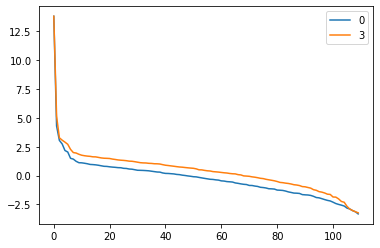

In [97]:

# fig, axs = plt.subplots(10, 2 , figsize=(20, 30))

# for idx, key in enumerate(df_svd.svd[0].keys()):
#     axs[idx, 0].plot([val[key][0] for val in svd_vals_before1], label="before sigma==1")
#     axs[idx, 0].plot([val[key][0] for val in svd_vals_before2], label="before sigma==2")
#     axs[idx, 0].plot([val[key][0] for val in svd_vals_before3], label="adv-before sigma==1")
#     axs[idx, 0].plot([val[key][0] for val in svd_vals_before4], label="adv-before sigma==2")
    
#     axs[idx, 0].plot([val[key][0] for val in svd_vals_during1], label="during sigma==1")
#     axs[idx, 0].plot([val[key][0] for val in svd_vals_during2], label="during sigma==2")
#     axs[idx, 0].legend()
#     axs[idx, 0].set_title(key)
    
#     # n     
#     axs[idx, 1].plot([val[key] for val in norm_vals_before1], label="before sigma==1")
#     axs[idx, 1].plot([val[key] for val in norm_vals_before2], label="before sigma==2")
    
#     axs[idx, 1].plot([val[key] for val in norm_vals_during1], label="during sigma==1")
#     axs[idx, 1].plot([val[key] for val in norm_vals_during2], label="during sigma==2")
#     axs[idx, 1].legend()
#     axs[idx, 1].set_title(key)
    
    
plt.plot(np.log(df_svd.svd[0]["relu_1"]), label="0")
# plt.plot(np.log(df_svd.svd[0]["relu_2"]), label="1")
# plt.plot(np.log(df_svd.svd[0]["relu_3"]), label="3")
# plt.plot(np.log(df_svd.svd[0]["relu_4"]), label="4")

# plt.plot(np.log(df_svd.svd[2]["relu_1"]), label="1")
plt.plot(np.log(df_svd.svd[4]["relu_1"]), label="3")
# plt.plot(np.log(df_svd.svd[6]["relu_1"]), label="4")

plt.legend()

dict_keys(['linear_1', 'relu_1', 'relu_2', 'relu_3', 'relu_4', 'flatten', 'dropout', 'linear_end', 'sigmoid_act', 'output_layer'])

In [106]:
for idx in range(8):
    sqr_vals = np.square(df_svd.svd[idx]["relu_1"])
    print(sum(sqr_vals[1:5])/(sum(sqr_vals)))

6.362338746312451e-09
8.786248578067342e-09
1.3642667204000666e-08
1.1799132051788327e-08
3.228224472117448e-08
3.2102079466632575e-08
3.762237319965952e-08
2.9792542939840316e-08
